In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# [1] Load 
np.random.seed(0)
N = 60000
# Numeric features: soil properties (e.g. N, P, K, pH, moisture, etc.)
numeric_cols = [f"num_{i}" for i in range(14)]
numeric = pd.DataFrame(np.random.rand(N, 14), columns=numeric_cols)

# Introduce some missing values
mask = np.random.rand(N, 14) < 0.01
numeric[mask] = np.nan

# Categorical features: e.g. texture and color
texture = np.random.choice(['Sand', 'Loam', 'Clay'], size=N)
color = np.random.choice(['Brown', 'Red', 'Black'], size=N)
df = pd.concat([numeric, pd.Series(texture, name='texture'), pd.Series(color, name='color')], axis=1)

# [2] Handle missing values
imp = SimpleImputer(strategy='median')
X_num = imp.fit_transform(df[numeric_cols])

# [3] Encode categorical features with one-hot encoding
ohe = OneHotEncoder(sparse=False, drop=None)
X_cat = ohe.fit_transform(df[['texture','color']])
cat_feature_names = ohe.get_feature_names_out(['texture', 'color'])

# [4] Scale numeric features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Final feature matrix for clustering
X = np.hstack((X_num_scaled, X_cat))

# Combine feature names
final_feature_names = numeric_cols + list(cat_feature_names)

# Create final DataFrame to view all features
X_df = pd.DataFrame(X, columns=final_feature_names)

# Show the column names
print("Final feature columns:")
print(X_df.columns.tolist())

# Optionally: show the first few rows
print("\nSample data:")
print(X_df.head())


Final feature columns:
['num_0', 'num_1', 'num_2', 'num_3', 'num_4', 'num_5', 'num_6', 'num_7', 'num_8', 'num_9', 'num_10', 'num_11', 'num_12', 'num_13', 'texture_Clay', 'texture_Loam', 'texture_Sand', 'color_Black', 'color_Brown', 'color_Red']

Sample data:
      num_0     num_1     num_2     num_3     num_4     num_5     num_6  \
0  0.167857  0.746154  0.358940  0.149912 -0.265494  0.507913 -0.218479   
1 -1.501090 -1.436673 -1.672356  1.148788  0.969806  1.289135  1.667199   
2  0.073664 -0.298331 -0.820368  0.946101 -0.152260  0.237906 -1.678130   
3  0.687699 -1.530178  0.582115  0.586469 -1.008664 -1.294113 -0.644244   
4  0.532174 -0.859175 -0.116862 -0.893124 -1.187818 -1.358777  0.543913   

      num_7     num_8     num_9    num_10    num_11    num_12    num_13  \
0  1.358386  1.615611 -0.402544  1.004677  0.101011  0.231958  1.485988   
1  1.037400 -0.130777  0.978564 -1.335073  0.487632 -1.247702  1.552451   
2  0.408273  0.393005  0.409564  1.532847  0.633535 -0.494601 -0.

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans silhouette: 0.6586478247336219
DBSCAN silhouette: -0.13492832888070813
Agglomerative silhouette: 0.6578604928940605


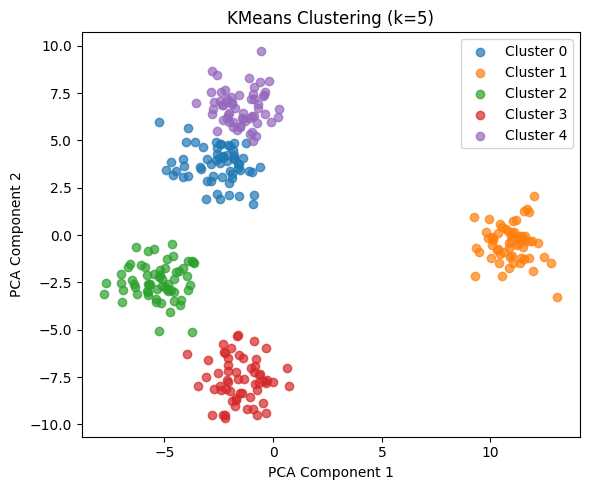

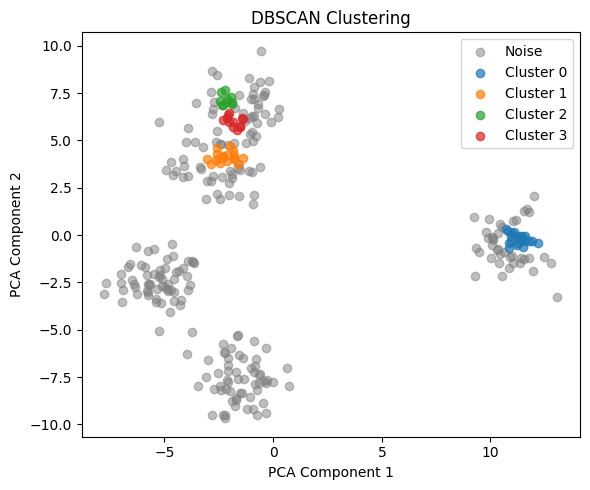

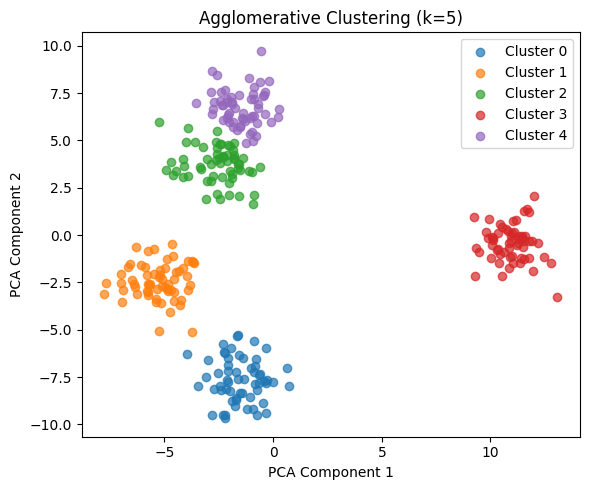

In [2]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# [1] Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)

# [2] Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=1)
labels_k = kmeans.fit_predict(X)
print("KMeans silhouette:", silhouette_score(X, labels_k))

# [3] Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels_db = dbscan.fit_predict(X)
n_clusters_dbscan = len(set(labels_db)) - (1 if -1 in labels_db else 0)
if n_clusters_dbscan > 1:
    print("DBSCAN silhouette:", silhouette_score(X, labels_db))
else:
    print("DBSCAN silhouette: Not applicable (less than 2 clusters)")

# [4] Apply Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels_hier = agg.fit_predict(X)
print("Agglomerative silhouette:", silhouette_score(X, labels_hier))

# [5] Optional: Use PCA to reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# [6] Plotting function
def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(6, 5))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        mask = labels == label
        if label == -1:
            plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c='gray', label='Noise', alpha=0.5)
        else:
            plt.scatter(X_2d[mask, 0], X_2d[mask, 1], label=f'Cluster {label}', alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

# [7] Plot all clustering results
plot_clusters(X_pca, labels_k, "KMeans Clustering (k=5)")
plot_clusters(X_pca, labels_db, "DBSCAN Clustering")
plot_clusters(X_pca, labels_hier, "Agglomerative Clustering (k=5)")

# [8] Choose one clustering result as supervised label
y = labels_k  # You can now use `y` as labels for supervised tasks



========== Logistic Regression ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       0.95      1.00      0.97        18

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



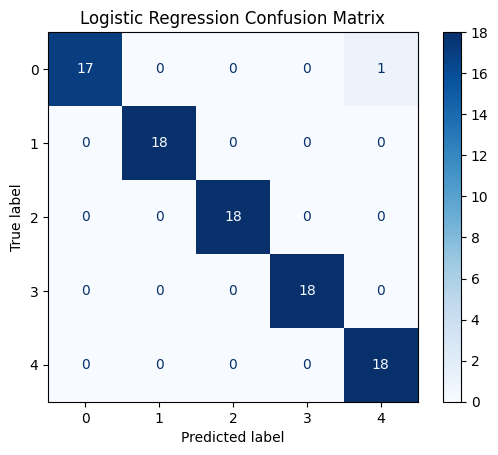


========== SVM ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



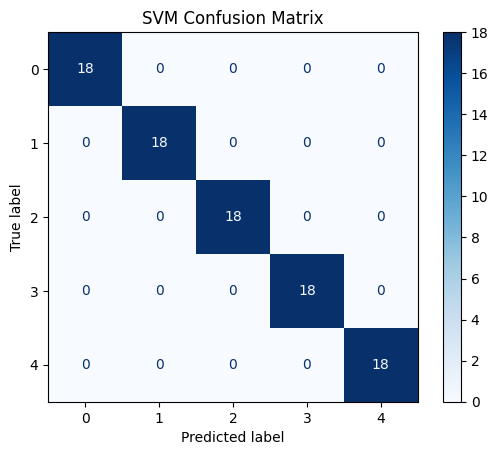


========== Random Forest ==========
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      0.89      0.94        18

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



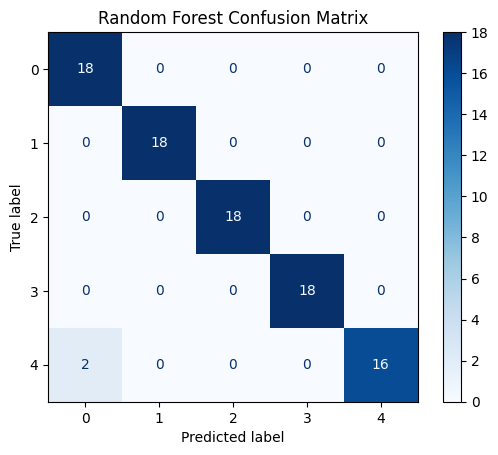


========== XGBoost ==========
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      1.00      1.00        18
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        18
           4       1.00      0.89      0.94        18

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



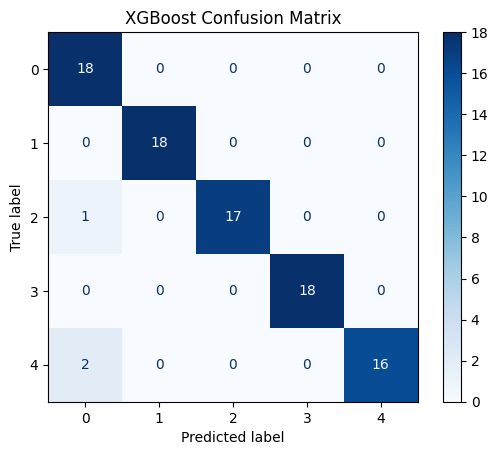


========== KNN ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



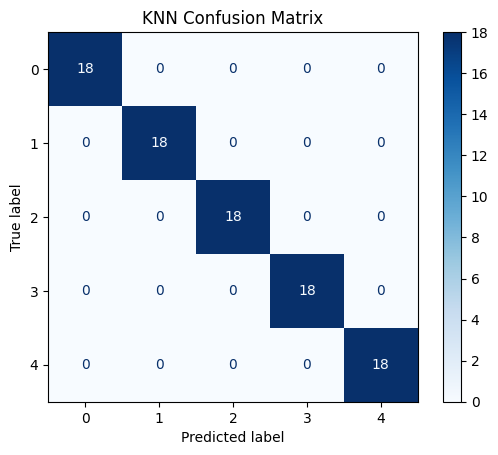


========== Naive Bayes ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



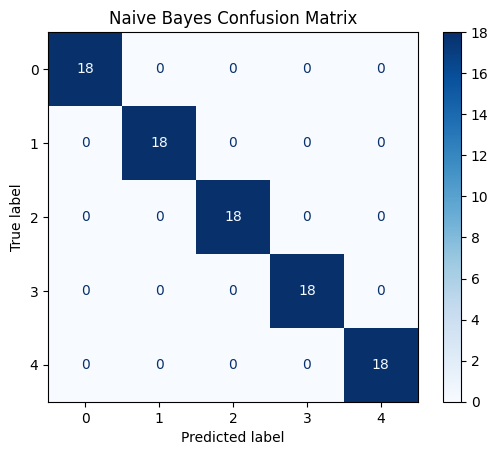


========== Decision Tree ==========
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       1.00      1.00      1.00        18
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        18
           4       0.94      0.89      0.91        18

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



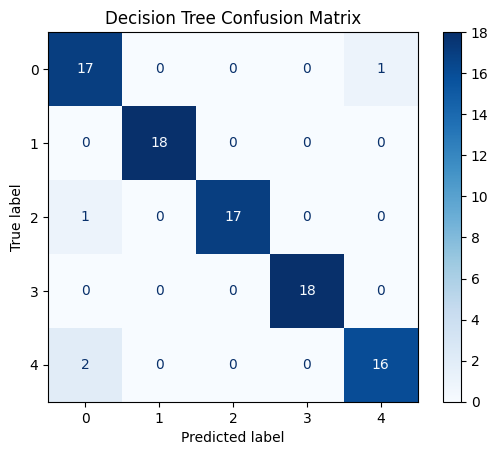


========== Gradient Boosting ==========
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       1.00      1.00      1.00        18
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        18
           4       0.94      0.89      0.91        18

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



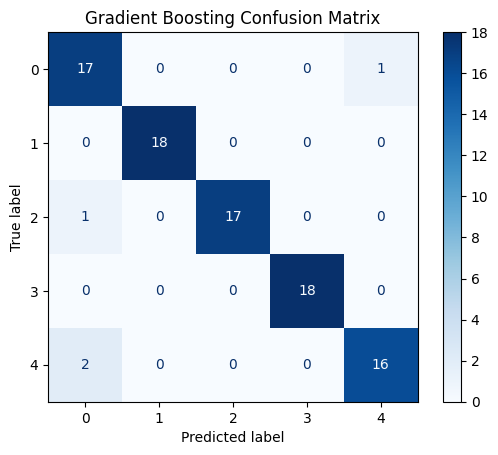


========== Extra Trees ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



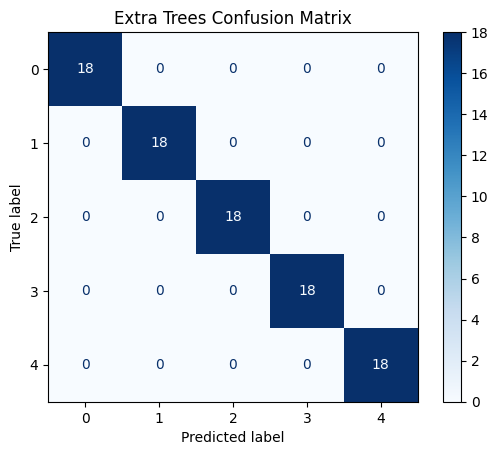


========== MLP Neural Net ==========


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       0.95      1.00      0.97        18

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



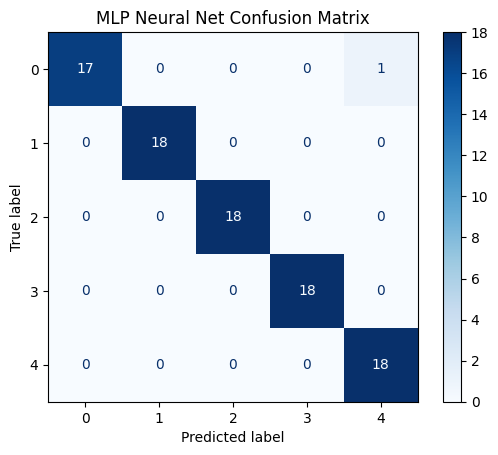

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# [8] Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# [9] Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'MLP Neural Net': MLPClassifier(max_iter=300)
}

# [10] Train, predict and evaluate
for name, model in models.items():
    print(f"\n{'='*10} {name} {'='*10}")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import numpy as np
import os

# [10] Build improved MLP model
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(len(np.unique(y)), activation='softmax')
])
mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# [11] Add callbacks for early stopping and best model saving
if not os.path.exists("models"):
    os.makedirs("models")
    
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("models/best_mlp.h5", monitor='val_loss', save_best_only=True)

# [12] Train the MLP
history = mlp.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# [13] Predict & evaluate
mlp_preds = np.argmax(mlp.predict(X_test), axis=1)
print("\nImproved MLP Classification Report:")
print(classification_report(y_test, mlp_preds))


2025-06-01 08:10:12.137913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748765412.375903      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748765412.437660      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-01 08:10:26.008247: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 451ms/step - accuracy: 0.1737 - loss: 2.6141 - val_accuracy: 0.3333 - val_loss: 1.3894
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4185 - loss: 1.4597 - val_accuracy: 0.4048 - val_loss: 1.2403
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6803 - loss: 0.8237 - val_accuracy: 0.5000 - val_loss: 1.1378
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8304 - loss: 0.5776 - val_accuracy: 0.5238 - val_loss: 1.0530
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8816 - loss: 0.4275 - val_accuracy: 0.5238 - val_loss: 0.9791
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9289 - loss: 0.3202 - val_accuracy: 0.5476 - val_loss: 0.9114
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9315 - loss: 0.2448 - val_accuracy: 0.6429 - val_loss: 0.8498
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9566 - loss: 0.1903 - val_accuracy: 0.6667 - val_loss: 0.7964
Epo

In [5]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Fix random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Number of folds
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# OOF prediction arrays
n_classes = len(np.unique(y))
rf_oof = np.zeros((X.shape[0], n_classes))
xgb_oof = np.zeros_like(rf_oof)
mlp_oof = np.zeros_like(rf_oof)

# Ensemble training loop
for train_idx, valid_idx in skf.split(X, y):
    X_train_fold, X_valid_fold = X[train_idx], X[valid_idx]
    y_train_fold, y_valid_fold = y[train_idx], y[valid_idx]

    # Random Forest
    rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    rf.fit(X_train_fold, y_train_fold)
    rf_oof[valid_idx] = rf.predict_proba(X_valid_fold)

    # XGBoost
    xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6,
                        use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb.fit(X_train_fold, y_train_fold)
    xgb_oof[valid_idx] = xgb.predict_proba(X_valid_fold)

    # MLP
    mlp_fold = Sequential([
        Dense(512, activation='relu', input_shape=(X.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(n_classes, activation='softmax')
    ])
    mlp_fold.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    mlp_fold.fit(X_train_fold, y_train_fold, epochs=25, batch_size=64, verbose=0)
    mlp_oof[valid_idx] = mlp_fold.predict(X_valid_fold)

# Meta features and targets
meta_X = np.hstack([rf_oof, xgb_oof, mlp_oof])
meta_y = y

# Train/test split for meta-model
X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(
    meta_X, meta_y, test_size=0.3, random_state=42, stratify=meta_y
)

# Train meta-classifier
meta_clf = LogisticRegression(max_iter=2000)
meta_clf.fit(X_meta_train, y_meta_train)

# Final base models on full training data
rf_final = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42).fit(X_train, y_train)
xgb_final = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6,
                          use_label_encoder=False, eval_metric='mlogloss', random_state=42).fit(X_train, y_train)

mlp_final = Sequential([
    Dense(512, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])
mlp_final.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_final.fit(X_train, y_train, epochs=25, batch_size=64, verbose=0)

# Predict on test set using final models
rf_test_probs = rf_final.predict_proba(X_test)
xgb_test_probs = xgb_final.predict_proba(X_test)
mlp_test_probs = mlp_final.predict(X_test)

# Meta test prediction
meta_test_X = np.hstack([rf_test_probs, xgb_test_probs, mlp_test_probs])
meta_preds = meta_clf.predict(meta_test_X)

# Evaluation
acc = accuracy_score(y_test, meta_preds)
print("\n Final Stacked Hybrid Model Classification Report:")
print(classification_report(y_test, meta_preds))
print(f" Final Hybrid Model Accuracy: {acc*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

 Final Stacked Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      0.89      0.94        18

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90

 Final Hybrid Model Accuracy: 97.78%



Stacked Model Logistic Regression 10-fold F1 (macro): 0.9830 ± 0.0230
Stacked Model ROC-AUC (OVR): 1.0000
Stacked Model Accuracy: 0.9778
Stacked Model RMSE: 0.5963
Stacked Model MAE: 0.0889
Stacked Model Confusion Matrix:
 [[18  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 18  0]
 [ 2  0  0  0 16]]


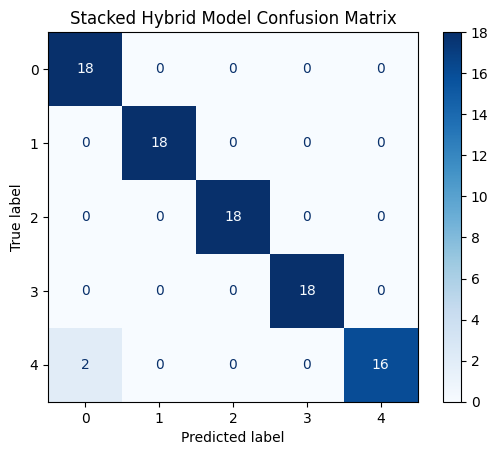

In [6]:
from sklearn.metrics import (
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 10-fold CV on meta-classifier (stacked Logistic Regression) ---
cv_scores = cross_val_score(meta_clf, meta_X, meta_y, cv=10, scoring='f1_macro')
print(f"\nStacked Model Logistic Regression 10-fold F1 (macro): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# --- ROC-AUC on stacked model test predictions ---
# Convert y_test to one-hot encoding for multiclass ROC-AUC
y_test_ohe = pd.get_dummies(y_test)

# For ROC-AUC, get meta-classifier predicted probabilities
meta_test_probs = meta_clf.predict_proba(meta_test_X)
roc_auc = roc_auc_score(y_test_ohe, meta_test_probs, multi_class='ovr')
print(f"Stacked Model ROC-AUC (OVR): {roc_auc:.4f}")

# --- Regression-style evaluation on stacked predictions ---
print(f"Stacked Model Accuracy: {accuracy_score(y_test, meta_preds):.4f}")
print(f"Stacked Model RMSE: {np.sqrt(mean_squared_error(y_test, meta_preds)):.4f}")
print(f"Stacked Model MAE: {mean_absolute_error(y_test, meta_preds):.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, meta_preds)
print("Stacked Model Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Stacked Hybrid Model Confusion Matrix")
plt.show()